In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [22]:
# can probs get it down to O(n)
def S_euler(S0, sigma, r, T, N = 1000):
    M = 1000 # how many turns in each path
    dt = T/M
    paths = []

    for i in range(N): # iterating for each path
        S = np.zeros(M+1) # stock path for one of them
        S[0] = S0 # intial stock price is S0

        for n in range(M):
            epsilon = np.random.normal(loc = 0, scale = 1) # sample change from norm dist
            S[n+1] = S[n] + r * S[n] * dt + sigma * S[n] * np.sqrt(dt) * epsilon # plugging each into euler formula

        paths.append(S) # adding the path to the bank
        
    return paths

In [18]:
paths = S_euler(100, 0.25, 0.07, 1)
paths

[array([100.        ,  99.33823198, 100.87144023, ..., 123.1462616 ,
        122.97638068, 122.85444677]),
 array([100.        , 100.13496104,  99.6803565 , ..., 103.82205335,
        103.70016923, 103.30476157]),
 array([100.        , 100.81156408,  99.71922499, ..., 101.18565453,
        101.33349278, 101.23707088]),
 array([100.        ,  99.60254367,  99.67093776, ...,  94.53196876,
         94.64101511,  95.05518745]),
 array([100.        , 100.78011038, 103.07433485, ...,  72.97689295,
         73.07658268,  72.76260548])]

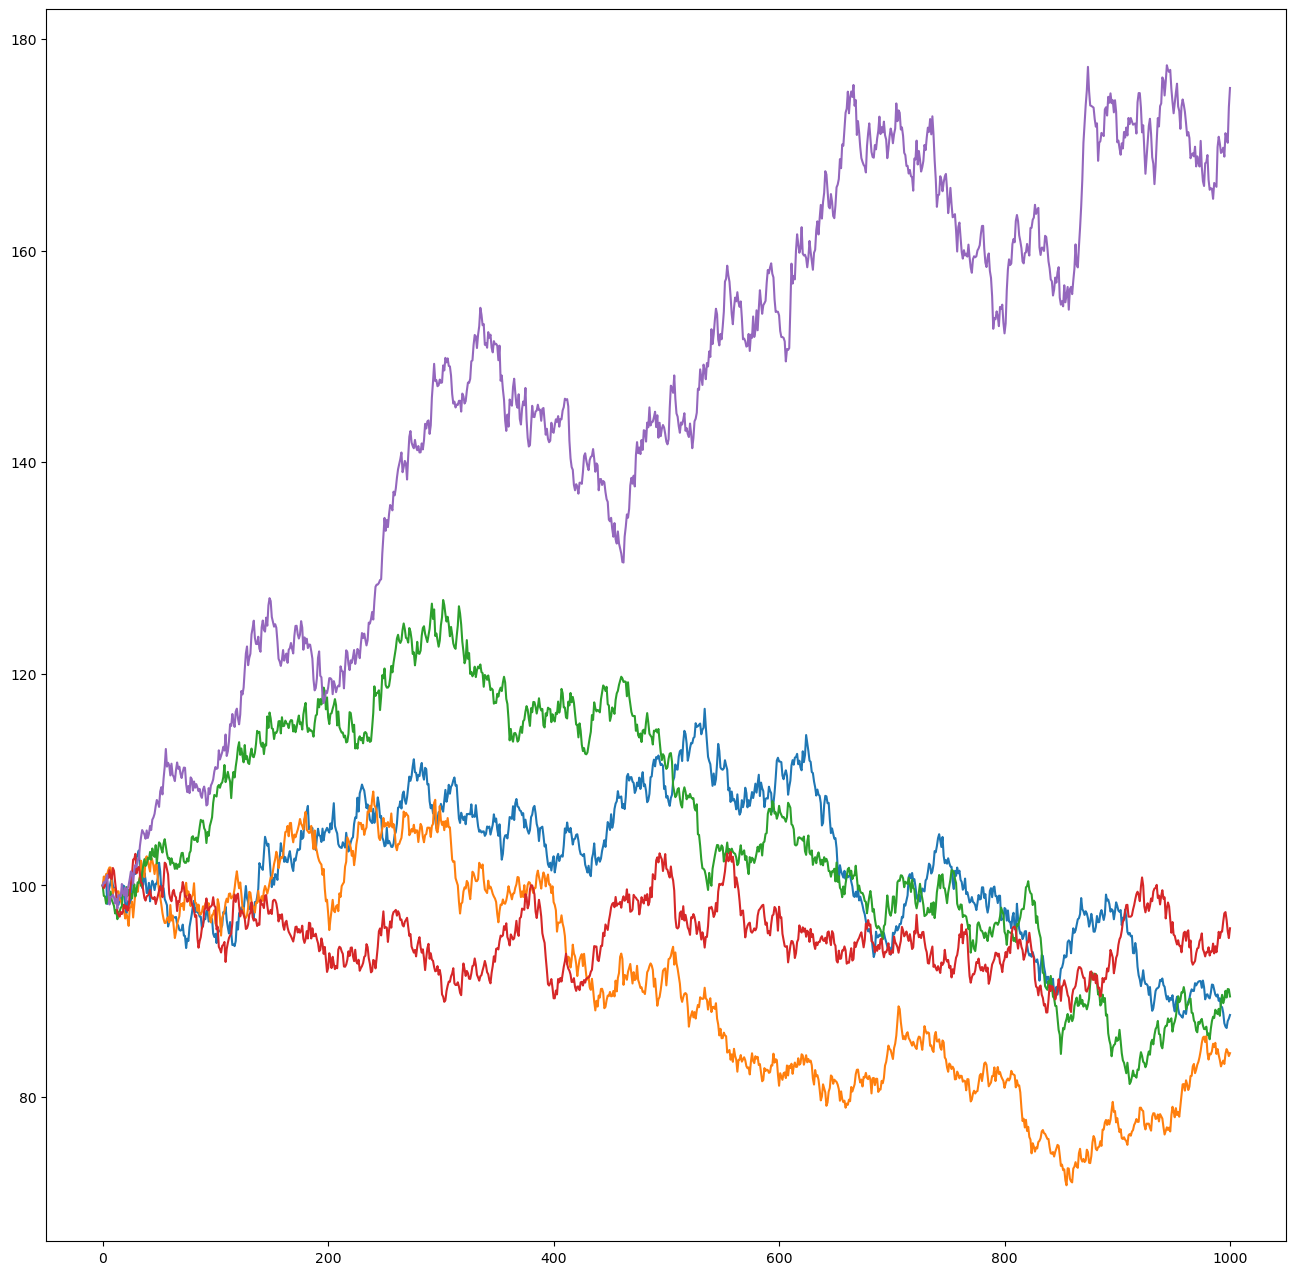

In [16]:
fig, ax = subplots(figsize = (16, 16))
for i in range(len(paths)): # just plotting everything
    ax.plot(paths[i])
# ye looks good

In [60]:
# there is like a gazilion ways to weight stocks in basket, but ill just use equal weight (average basically)
def basketPutPrice(S0, sigma, r, T, b_size, K):
    '''
    input: b_size = basket size (how many stocks involved)
    output: price
    '''
    payoff = []
    for _ in range(1000):
        basket = np.array(S_euler(S0, sigma, r, T, b_size))
        basket_price = np.mean(basket[:, -1]) # mean of final prices of b_size stocks

        payoff.append(np.maximum(0,basket_price - K))

    price = np.e ** (-r * T) * np.mean(payoff) # plug into foramula
    return price

In [64]:
basketPutPrice(100, 0.25, 0.07, 1, 5, 100)

1.8152111413006784